# Wrangle and Analyze Data

In this project, we will be wrangling WeRateDogs Twitter data. The data will then be used to create visualizations and related analysis to get more insight into data.

We will follow the data wrangling steps:
1. Gather 
2. Assess 
3. Clean

Data has to be gathered from multiple sources:
1. Udacity URL call to get image prediction data in a TSV file
2. Provided 'twitter-archive-enhanced.csv' file
3. Twitter API call to create 'tweet_json.txt' file

## Gather

### Step 1:
Let's first download 'image-predictions.tsv' from Udacity server.

In [168]:
import requests
import pandas as pd
import tweepy as tw
import numpy as np



url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = 'image-predictions.tsv'

r = requests.get(url, allow_redirects=True)
open(filename, 'wb').write(r.content)

df_pred = pd.read_csv('image-predictions.tsv', sep='\t')
df_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

Now we have image predictions data in a file and available for analysis in dataframe df_pred.

### Step 2:
Next step is to read the provided 'twitter-archive-enhanced.csv' file

In [169]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

Data is now available in a dataframe called df_arch for analysis and cleaning

By now we have 2 data frames with 2 data sources. 

### Step 3:
Now, we need to download data from Twitter API.


In [170]:
#### Twitter API
####
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'ITcJ9F1Elzm5R8X2vj33oRVnY'
consumer_secret = 'Gg75yVPlxLd8aMJMGs5jJGPhXRZgxSF196UyAKI3zC1VWVA3VA'
access_token = '1206352053540245504-uAYgo1gWXiHGOrytuAWWJsxPiwsubx'
access_secret = 'M6Jpr9zFGOdVdX6jWVT2NsE6tuHDmI0AfZc9vuuttsjDL'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810

Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
1065: 740995100998766593
Success
10

Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
13

Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
15

Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
18

Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
20

Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
23

<b>Reading the data from Twitter into a list

In [171]:
import json

data_tweet = []

# Reading the collected data from twitter site into a list
with open('tweet_json.txt') as file:
    line = file.readline()
    while line:
        line = file.readline()
        try:
            js = json.loads(line)
            data_tweet.append(js)
        except:
            print("An exception occurred")
            print(line)

data_tweet


An exception occurred



[{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
  'id': 892177421306343426,
  'id_str': '892177421306343426',
  'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
  'truncated': False,
  'display_text_range': [0, 138],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892177413194625024,
     'id_str': '892177413194625024',
     'indices': [139, 162],
     'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
     'url': 'https://t.co/0Xxu71qeIV',
     'display_url': 'pic.twitter.com/0Xxu71qeIV',
     'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 1055, 'h': 1200, 'resize': 'fi

<b>Reading data from Twitter API in a dataframe

In [172]:
# Creating dataframe from list
df = pd.DataFrame(data_tweet)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2332 non-null object
display_text_range               2332 non-null object
entities                         2332 non-null object
extended_entities                2060 non-null object
favorite_count                   2332 non-null int64
favorited                        2332 non-null bool
full_text                        2332 non-null object
geo                              0 non-null object
id                               2332 non-null int64
id_str                           2332 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

#### With this gathering is complete. We have 3 dataframes with different types of data to assess, clean and analyze.


# Assess

We will be looking in details into various issues that the gathered data may have. We will be using info(), value_counts and query() functions to figure out the issues and then subsequently get rid of the issues using appropriate methods.

Let's first make a copy of the dataframes and start the assessment process.

In [173]:
df_arch_copy = df_arch.copy()
df_copy = df.copy()
df_pred_copy = df_pred.copy()

In [174]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [175]:
df_arch.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2332 non-null object
display_text_range               2332 non-null object
entities                         2332 non-null object
extended_entities                2060 non-null object
favorite_count                   2332 non-null int64
favorited                        2332 non-null bool
full_text                        2332 non-null object
geo                              0 non-null object
id                               2332 non-null int64
id_str                           2332 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [177]:
df.head()

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
1         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
2         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
3         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   
4         None        None  Sat Jul 29 00:08:17 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892177413194625024, 'id_str'...           31692   
1  {'media': [{'id': 891815175371796480, 'id_str'...           23871   
2  {'media': [{'id': 891689552724799489, 'id_str'...           40124   
3  {'media': [{'id': 891327551943041024, 'id_str'...           38322   
4  {'media': [{'id': 891087942176911360, 'id_str'...           19278   

   favorited                                          full_text   geo  ...  \
0      False  This is Tilly. She's just checking pup on you....  None  ...   
1      False  This is Archie. He is a rare Norwegian Pouncin...  None  ...   
2      False  This is Darla. She commenced a snooze mid meal...  None  ...   
3      False  This is Franklin. He would like you to stop ca...  None  ...   
4      False  Here we have a majestic great white breaching ...  None  ...   

   quoted_status quoted_status_id quoted_status_id_str  \
0            NaN              NaN                  NaN   
1            NaN              NaN                  NaN   
2            NaN              NaN                  NaN   
3            NaN              NaN                  NaN   
4            NaN              NaN                  NaN   

   quoted_status_permalink retweet_count  retweeted retweeted_status  \
0                      NaN          5812      False              NaN   
1                      NaN          3845      False              NaN   
2                      NaN          8005      False              NaN   
3                      NaN          8657      False              NaN   
4                      NaN          2884      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 32 columns]

In [178]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [179]:
df_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [180]:
# This shows a various issues with expanded_urls column
df_arch.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/679462823135686656/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1                                                                                                                                                                        2
https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1    2
https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616

In [181]:
df_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [182]:
df_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [183]:
df_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [184]:
df_arch.query('rating_numerator>20')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1712  680494726643068929                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
290   2017-03-04 22:12:52 +0000   
313   2017-02-24 21:54:03 +0000   
340   2017-02-16 13:11:49 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1712  2015-12-25 21:06:00 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1712  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/downloa

In [185]:
sorted(df_arch['name'].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [186]:
df_pred.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [187]:
df_pred.tweet_id.value_counts()


685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [188]:
df_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1

##### Based on the assessment above we have found following issues with the data and we will be cleaning the data to make sure these issues are resolved

### Quality Issues:

In archive data expanded_url column
1. Urls which are not hosted on twitter.com (vine.co, gofundme etc)
2. Urls not related to dog_rates/status
3. Urls which are video instead of photo
4. Same Url inserted multiple times in a cell

In archive data rating numerator and denominator columns
1. Denominators are found to be other than 10, including 0
2. Some numerator values are very high
3. No standard rating available due to changing denominators

In archive data timestamp and name columns
1. Changing timestamp column data type and filter records
2. Remove data after 08/01/2017
3. Wrong names, some random words entered as names

In archive data source column
1. Remove unnecessary data and keep only the name of the source as a single word

##### These a total of 11 quality issues we are targeting to fix.

### Tidiness Issues:
1. In archived data, dog stage should ideally be a column with doggo, puppo, pupper and floofer as values for the stage columns. Instead, we see these values in their own columns.
2. Merge 3 different data sets based on tweet id
3. Remove unnecessary columns which are not required, especially the ones which are related to retweets

##### These a total of 3 tidiness issues we are targeting to fix.


# Cleaning

Based on the assessment report we will be cleaning the data now.

#### Define
Removing unnecessary data (rows and columns) from tweeter data

In [189]:
# Code
df_json = df[['id','retweet_count','favorite_count']]

# Test
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
id                2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define
Removing unnecessary data (rows and columns) from archive data

In [190]:
# Code
df_arch_orig = df_arch[df_arch['retweeted_status_id'].isna()]
to_be_dropped = []
to_be_dropped.append('in_reply_to_status_id')
to_be_dropped.append('in_reply_to_user_id')
to_be_dropped.append('retweeted_status_id')
to_be_dropped.append('retweeted_status_user_id')
to_be_dropped.append('retweeted_status_timestamp')
#to_be_dropped.append('rating_denominator')
df_arch_orig = df_arch_orig.drop(columns=to_be_dropped)

# Test the code
df_arch_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define
All the quality issues with data in expanded urls column in archive data


In [191]:
# Code
    # This function will check valid URLs for expanded_urls column
    # We will remove URLs from the list unless it is on twitter.com
    # and has "dog_rates/status" string in it
    # There can be URLs which are not really on twitter.com
    # E.g. you can see a gofundme and vine.co urls
    # Also, some URLs are twitter URLs but aren't really dog_rates/status
    # but URL with 'abc' or some other characters and sometimes they are
    # video urls
    # Also, same URL has been inserted multiple times in the expanded_urls columns
    # So, will try to push multiple only if they are unique

def checkforbadurls(url):
    if ',http' in url:
        urls = url.split(',')
        new_urls=[]
        for u in urls:
            if u.startswith('https://twitter') and 'dog_rates/status' in u and '/photo/' in u:
                new_urls.append(u.strip())
            new_urls = list(set(new_urls))
            return ','.join(new_urls)
    else:
        if url.startswith('https://twitter') and 'dog_rates/status' in url and '/photo/' in url:
            return url.strip()
        else:
            return np.nan


In [192]:
    # There is vine.co URl showing up twice. Let's further query it.
df_arch_orig.query('expanded_urls=="https://vine.co/v/ea0OwvPTx9l"')


    # Above one is a video URL and has been repeated. It should be cleared as we are using photos only.
df_arch_orig.loc[df_arch_orig['expanded_urls'] == 'https://vine.co/v/ea0OwvPTx9l', 'expanded_urls'] = np.nan
    # Apply the function to clean all the urls
df_arch_orig['expanded_urls'] = df_arch_orig['expanded_urls'].apply(lambda x : checkforbadurls(str(x)) if x==x else x)

In [193]:
# Test
df_arch_orig.expanded_urls.value_counts()

                                                                   28
https://twitter.com/dog_rates/status/814153002265309185/photo/1     1
https://twitter.com/dog_rates/status/674999807681908736/photo/1     1
https://twitter.com/dog_rates/status/669214165781868544/photo/1     1
https://twitter.com/dog_rates/status/730196704625098752/photo/1     1
https://twitter.com/dog_rates/status/667885044254572545/photo/1     1
https://twitter.com/dog_rates/status/666418789513326592/photo/1     1
https://twitter.com/dog_rates/status/803276597545603072/photo/1     1
https://twitter.com/dog_rates/status/866686824827068416/photo/1     1
https://twitter.com/dog_rates/status/673711475735838725/photo/1     1
https://twitter.com/dog_rates/status/667495797102141441/photo/1     1
https://twitter.com/dog_rates/status/777684233540206592/photo/1     1
https://twitter.com/dog_rates/status/727685679342333952/photo/1     1
https://twitter.com/dog_rates/status/698953797952008193/photo/1     1
https://twitter.com/

#### Define 
Tidiness issue with doggo, floofer, pupper, puppo columns

In [194]:
# Code
    # We will melt the dataframe now to remove doggo, puppo etc as columns
    # We will create a stage column with appropriate value of stage in it

    # Get all tweets where dog stage is not specified. No need to melt these
df_arch_nostage = df_arch_orig.query('doggo=="None" and floofer=="None" and pupper=="None" and puppo=="None"')
df_arch_nostage.reset_index()
df_arch_nostage.info()

    # Get all tweets where dog stage is specified. We need to melt these.
df_arch_stage = df_arch_orig.query('doggo!="None" or floofer!="None" or pupper!="None" or puppo!="None"')
df_arch_stage.reset_index()
df_arch_orig.info()

    # Let's not melt it.
var_list = list(df_arch_orig)
var_list.remove('puppo')
var_list.remove('doggo')
var_list.remove('floofer')
var_list.remove('pupper')

df_arch_stage_melt = pd.melt(df_arch_orig, id_vars = var_list, var_name="stage", value_name="stage_val")
    # this created data where we have dog stage with none values
    # we will have to clean the none value as it 
    # is creating a lot of duplicate tweets in the dataframe
df_arch_stage_melt.info()
df_arch_stage_melt_clean = df_arch_stage_melt.query('stage==stage_val')
df_arch_stage_melt_clean.info()
df_arch_stage_melt_clean.sample(10)

df_arch_stage_melt_clean.tweet_id.value_counts()
    # we still see a few duplicate tweet ids
    # These are tweet for which we have multiple values of dog stage specified
    # We will remove them
df_arch_stage_melt_clean = df_arch_stage_melt_clean.drop_duplicates(subset='tweet_id')
df_arch_stage_melt_clean.tweet_id.value_counts()
    # We need to append the dataframe of all the dogs for which 
    # dog stage is not identified
df_arch_nostage = df_arch_nostage.drop(columns=['doggo','pupper','puppo','floofer'])
df_arch_nostage['stage'] = 'None'
df_arch_stage_melt_clean = df_arch_stage_melt_clean.drop(columns=['stage_val'])
df_arch_clean = df_arch_stage_melt_clean.append(df_arch_nostage)
df_arch_clean.reset_index()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1831 non-null int64
timestamp             1831 non-null object
source                1831 non-null object
text                  1831 non-null object
expanded_urls         1633 non-null object
rating_numerator      1831 non-null int64
rating_denominator    1831 non-null int64
name                  1831 non-null object
doggo                 1831 non-null object
floofer               1831 non-null object
pupper                1831 non-null object
puppo                 1831 non-null object
dtypes: int64(3), object(9)
memory usage: 186.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         1920 non-null object
rating_

index            tweet_id                  timestamp  \
0         9  890240255349198849  2017-07-26 15:59:51 +0000   
1        40  884162670584377345  2017-07-09 21:29:42 +0000   
2        89  872967104147763200  2017-06-09 00:02:31 +0000   
3        97  871515927908634625  2017-06-04 23:56:03 +0000   
4        98  871102520638267392  2017-06-03 20:33:19 +0000   
5       108  869596645499047938  2017-05-30 16:49:31 +0000   
6       149  858843525470990336  2017-05-01 00:40:27 +0000   
7       165  855851453814013952  2017-04-22 18:31:02 +0000   
8       172  854010172552949760  2017-04-17 16:34:26 +0000   
9       206  846514051647705089  2017-03-28 00:07:32 +0000   
10      213  845397057150107648  2017-03-24 22:08:59 +0000   
11      255  836753516572119041  2017-03-01 01:42:39 +0000   
12      268  834574053763584002  2017-02-23 01:22:14 +0000   
13      272  834089966724603904  2017-02-21 17:18:39 +0000   
14      279  832998151111966721  2017-02-18 17:00:10 +0000   
15      286  832273440279240704  2017-02-16 17:00:25 +0000   
16      288  832032802820481025  2017-02-16 01:04:13 +0000   
17      289  831939777352105988  2017-02-15 18:54:34 +0000   
18      295  831322785565769729  2017-02-14 02:02:51 +0000   
19      304  829449946868879360  2017-02-08 22:00:52 +0000   
20      305  829374341691346946  2017-02-08 17:00:26 +0000   
21      313  828381636999917570  2017-02-05 23:15:47 +0000   
22      324  826958653328592898  2017-02-02 01:01:21 +0000   
23      325  826848821049180160  2017-02-01 17:44:55 +0000   
24      328  826476773533745153  2017-01-31 17:06:32 +0000   
25      330  826204788643753985  2017-01-30 23:05:46 +0000   
26      355  821765923262631936  2017-01-18 17:07:18 +0000   
27      357  821407182352777218  2017-01-17 17:21:47 +0000   
28      360  821107785811234820  2017-01-16 21:32:06 +0000   
29      367  819924195358416896  2017-01-13 15:08:56 +0000   
...     ...                 ...                        ...   
2145   2326  666411507551481857  2015-11-17 00:24:19 +0000   
2146   2327  666407126856765440  2015-11-17 00:06:54 +0000   
2147   2328  666396247373291520  2015-11-16 23:23:41 +0000   
2148   2329  666373753744588802  2015-11-16 21:54:18 +0000   
2149   2330  666362758909284353  2015-11-16 21:10:36 +0000   
2150   2331  666353288456101888  2015-11-16 20:32:58 +0000   
2151   2332  666345417576210432  2015-11-16 20:01:42 +0000   
2152   2333  666337882303524864  2015-11-16 19:31:45 +0000   
2153   2334  666293911632134144  2015-11-16 16:37:02 +0000   
2154   2335  666287406224695296  2015-11-16 16:11:11 +0000   
2155   2336  666273097616637952  2015-11-16 15:14:19 +0000   
2156   2337  666268910803644416  2015-11-16 14:57:41 +0000   
2157   2338  666104133288665088  2015-11-16 04:02:55 +0000   
2158   2339  666102155909144576  2015-11-16 03:55:04 +0000   
2159   2340  666099513787052032  2015-11-16 03:44:34 +0000   
2160   2341  666094000022159362  2015-11-16 03:22:39 +0000   
2161   2342  666082916733198337  2015-11-16 02:38:37 +0000   
2162   2343  666073100786774016  2015-11-16 01:59:36 +0000   
2163   2344  666071193221509120  2015-11-16 01:52:02 +0000   
2164   2345  666063827256086533  2015-11-16 01:22:45 +0000   
2165   2346  666058600524156928  2015-11-16 01:01:59 +0000   
2166   2347  666057090499244032  2015-11-16 00:55:59 +0000   
2167   2348  666055525042405380  2015-11-16 00:49:46 +0000   
2168   2349  666051853826850816  2015-11-16 00:35:11 +0000   
2169   2350  666050758794694657  2015-11-16 00:30:50 +0000   
2170   2351  666049248165822465  2015-11-16 00:24:50 +0000   
2171   2352  666044226329800704  2015-11-16 00:04:52 +0000   
2172   2353  666033412701032449  2015-11-15 23:21:54 +0000   
2173   2354  666029285002620928  2015-11-15 23:05:30 +0000   
2174   2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/

In [195]:
# Test
df_arch_clean.sample(5)

tweet_id                  timestamp  \
1208  715704790270025728  2016-04-01 00:58:13 +0000   
838   767500508068192258  2016-08-21 23:15:55 +0000   
1946  673705679337693185  2015-12-07 03:28:45 +0000   
2042  671538301157904385  2015-12-01 03:56:22 +0000   
1839  675891555769696257  2015-12-13 04:14:39 +0000   

                                                 source  \
1208  <a href="http://vine.co" rel="nofollow">Vine -...   
838   <a href="http://twitter.com/download/iphone" r...   
1946  <a href="http://twitter.com/download/iphone" r...   
2042  <a href="http://twitter.com/download/iphone" r...   
1839  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1208  This is Bentley. He gives kisses back. 11/10 p...   
838   This is Louie. He's making quite a h*ckin mess...   
1946  This is Dot. He found out you only pretended t...   
2042  This is Baxter. He's very calm. Hasn't eaten i...   
1839  This is Donny. He's summoning the demon monste...   

                                          expanded_urls  rating_numerator  \
1208                                                NaN                11   
838   https://twitter.com/dog_rates/status/767500508...                12   
1946  https://twitter.com/dog_rates/status/673705679...                 8   
2042  https://twitter.com/dog_rates/status/671538301...                 8   
1839  https://twitter.com/dog_rates/status/675891555...                 6   

      rating_denominator     name stage  
1208                  10  Bentley  None  
838                   10    Louie  None  
1946                  10      Dot  None  
2042                  10   Baxter  None  
1839                  10    Donny  None

#### Define
Convert timestampt column to appropriate data type and remove records after 08/01/2017

In [196]:

# Code
df_arch_clean['timestamp'] = df_arch_clean['timestamp'].astype('datetime64[ns]')
df_arch_clean = df_arch_clean.query('timestamp <= "08/01/2017"')



In [197]:
# Test
df_arch_clean.timestamp.max()

Timestamp('2017-07-31 00:18:03')

#### Define
All the various issues with rating numerator and denominator columns


In [198]:
# Code
    # We found denominator as 0, which is impossible. Denominator is general should be 10, but it is not the case.
    # Manual check of the URL for this record showed the correct rating as 13/10. Fixing that here.
df_arch_clean.loc[df_arch_clean['rating_numerator']==960,'rating_denominator'] = 10
df_arch_clean.loc[df_arch_clean['rating_numerator']==960,'rating_numerator'] = 13
    # Create a consistent rating mechanism by dividing numerator by denominator
df_arch_clean['rating'] = df_arch_clean['rating_numerator']/df_arch_clean['rating_denominator']


In [199]:
# Test
df_arch_clean.head()

tweet_id           timestamp  \
9   890240255349198849 2017-07-26 15:59:51   
40  884162670584377345 2017-07-09 21:29:42   
89  872967104147763200 2017-06-09 00:02:31   
97  871515927908634625 2017-06-04 23:56:03   
98  871102520638267392 2017-06-03 20:33:19   

                                               source  \
9   <a href="http://twitter.com/download/iphone" r...   
40  <a href="http://twitter.com/download/iphone" r...   
89  <a href="http://twitter.com/download/iphone" r...   
97  <a href="http://twitter.com/download/iphone" r...   
98  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
9   This is Cassie. She is a college pup. Studying...   
40  Meet Yogi. He doesn't have any important dog m...   
89  Here's a very large dog. He has a date later. ...   
97  This is Napolean. He's a Raggedy East Nicaragu...   
98  Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH   

                                        expanded_urls  rating_numerator  \
9   https://twitter.com/dog_rates/status/890240255...                14   
40  https://twitter.com/dog_rates/status/884162670...                12   
89  https://twitter.com/dog_rates/status/872967104...                12   
97  https://twitter.com/dog_rates/status/871515927...                12   
98                                                NaN                14   

    rating_denominator      name  stage  rating  
9                   10    Cassie  doggo     1.4  
40                  10      Yogi  doggo     1.2  
89                  10      None  doggo     1.2  
97                  10  Napolean  doggo     1.2  
98                  10      None  doggo     1.4

#### Define
Change the content of the source columne to more meaningful names


In [200]:

# Code
def getsource(url):
    if 'iphone' in url:
        return 'iphone'
    elif 'Web' in url:
        return 'web'
    elif 'Vine' in url:
        return 'vine'
    elif 'tweetdeck' in url:
        return 'tweetdeck'
    else:
        return url

df_arch_clean['source'] = df_arch_clean['source'].apply(lambda x : getsource(str(x)))


In [201]:
# Test
df_arch_clean.head()

tweet_id           timestamp  source  \
9   890240255349198849 2017-07-26 15:59:51  iphone   
40  884162670584377345 2017-07-09 21:29:42  iphone   
89  872967104147763200 2017-06-09 00:02:31  iphone   
97  871515927908634625 2017-06-04 23:56:03  iphone   
98  871102520638267392 2017-06-03 20:33:19  iphone   

                                                 text  \
9   This is Cassie. She is a college pup. Studying...   
40  Meet Yogi. He doesn't have any important dog m...   
89  Here's a very large dog. He has a date later. ...   
97  This is Napolean. He's a Raggedy East Nicaragu...   
98  Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH   

                                        expanded_urls  rating_numerator  \
9   https://twitter.com/dog_rates/status/890240255...                14   
40  https://twitter.com/dog_rates/status/884162670...                12   
89  https://twitter.com/dog_rates/status/872967104...                12   
97  https://twitter.com/dog_rates/status/871515927...                12   
98                                                NaN                14   

    rating_denominator      name  stage  rating  
9                   10    Cassie  doggo     1.4  
40                  10      Yogi  doggo     1.2  
89                  10      None  doggo     1.2  
97                  10  Napolean  doggo     1.2  
98                  10      None  doggo     1.4

#### Define
Clean the dog names column in archive by removing all names starting with lower case letters


In [202]:
# Code
df_arch_clean['name'] = df_arch_clean['name'].apply(lambda x : np.nan if str(x)[0].islower() else str(x))


In [203]:
# Test
sorted(df_arch_clean[df_arch_clean['name'].notnull()].name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


#### Define
Merge dataframes containing archive and tweet data


In [204]:
# Code
merged_df = pd.merge(df_arch_clean, df_json, how='left', left_on='tweet_id', right_on='id')
df_final = pd.merge(merged_df, df_pred, on='tweet_id', how='inner')
df_final.head()

tweet_id           timestamp  source  \
0  890240255349198849 2017-07-26 15:59:51  iphone   
1  884162670584377345 2017-07-09 21:29:42  iphone   
2  872967104147763200 2017-06-09 00:02:31  iphone   
3  871515927908634625 2017-06-04 23:56:03  iphone   
4  869596645499047938 2017-05-30 16:49:31  iphone   

                                                text  \
0  This is Cassie. She is a college pup. Studying...   
1  Meet Yogi. He doesn't have any important dog m...   
2  Here's a very large dog. He has a date later. ...   
3  This is Napolean. He's a Raggedy East Nicaragu...   
4  This is Scout. He just graduated. Officially a...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/890240255...                14   
1  https://twitter.com/dog_rates/status/884162670...                12   
2  https://twitter.com/dog_rates/status/872967104...                12   
3  https://twitter.com/dog_rates/status/871515927...                12   
4  https://twitter.com/dog_rates/status/869596645...                12   

   rating_denominator      name  stage  rating  ...  img_num  \
0                  10    Cassie  doggo     1.4  ...        1   
1                  10      Yogi  doggo     1.2  ...        1   
2                  10      None  doggo     1.2  ...        2   
3                  10  Napolean  doggo     1.2  ...        2   
4                  10     Scout  doggo     1.2  ...        1   

                   p1   p1_conf p1_dog                        p2   p2_conf  \
0            Pembroke  0.511319   True                  Cardigan  0.451038   
1     German_shepherd  0.707046   True                  malinois  0.199396   
2  Labrador_retriever  0.476913   True  Chesapeake_Bay_retriever  0.174145   
3            komondor  0.974781   True                    briard  0.020041   
4           Chihuahua  0.955156   True               toy_terrier  0.008054   

   p2_dog                           p3   p3_conf  p3_dog  
0    True                    Chihuahua  0.029248    True  
1    True           Norwegian_elkhound  0.049148    True  
2    True  German_short-haired_pointer  0.092861    True  
3    True                         swab  0.003228   False  
4    True                       muzzle  0.006296   False  

[5 rows x 24 columns]

In [205]:
# Test
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
text                  1992 non-null object
expanded_urls         1918 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1894 non-null object
stage                 1992 non-null object
rating                1992 non-null float64
id                    1985 non-null float64
retweet_count         1985 non-null float64
favorite_count        1985 non-null float64
jpg_url               1992 non-null object
img_num               1992 non-null int64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-null float64
p2_dog                199

##### Let's store the final clean data in a CSV file

In [206]:

df_final.to_csv('twitter_archive_master.csv')

# Analysis and Visualization

Now we have clean data on dog rating. We can create some visualization to find out what insight does this data provide. Some possiblities are:

1. Which dogs are more popular? Retweet count and favorite count should give some information about which dog breeds are more popular. We will assume that the P1 prediction about dog breed is correct.

2. Which stage of dog is more popular? We can use the stage and retweet/favorites count.

3. How does the trending of retweet and favorite counts over time look like?

4. Which platform is used by twitter users more for dog related tweets (and possibly for other tweets too)?

5. Which dog stage and breed receive highest ratings?

6. Which are the most popular names for the dogs?

Let's start with the first one. Popular dog breed.

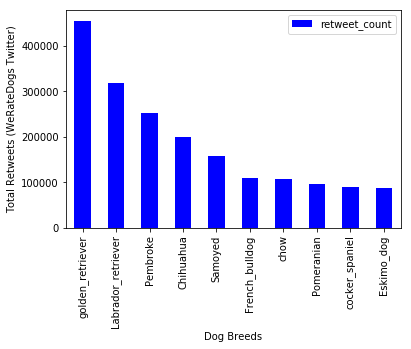

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

df_final.columns

vd1 = df_final.groupby(['p1'])['retweet_count'].sum().reset_index()
vd1 = vd1.sort_values('retweet_count', ascending=False)
vdx = vd1.head(10)
vdx.plot(x='p1',y='retweet_count', kind='bar', color='blue');
plt.xlabel('Dog Breeds')
plt.ylabel('Total Retweets (WeRateDogs Twitter)')
plt.show()

##### Most popular dog breeds are golden retriever, labrador retreiver and pembroke

Let's try the same analysis using favorite count

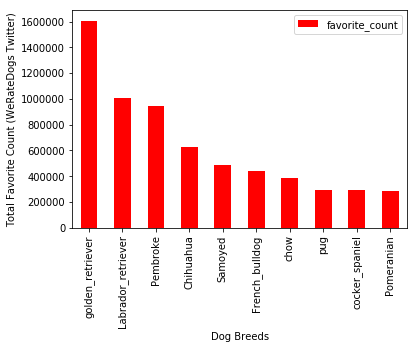

In [208]:
vd1 = df_final.groupby(['p1'])['favorite_count'].sum().reset_index()
vd1 = vd1.sort_values('favorite_count', ascending=False)
vdx = vd1.head(10)
vdx.plot(x='p1',y='favorite_count', kind='bar', color='red');
plt.xlabel('Dog Breeds')
plt.ylabel('Total Favorite Count (WeRateDogs Twitter)')
plt.show()

#### We can see the top 10 breeds of the dogs based on how many tweets favorites and retweets we see on twitter about them from WeRateDogs

Let's find out which stages of dogs are most tweeted about.

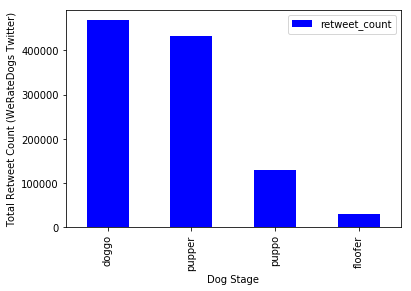

In [209]:
dfx = df_final.query('stage!="None"')
vd1 = dfx.groupby(['stage'])['retweet_count'].sum().reset_index()
vd1 = vd1.sort_values('retweet_count', ascending=False)
vdx = vd1.head(10)
vdx.plot(x='stage',y='retweet_count', kind='bar', color='blue');
plt.xlabel('Dog Stage')
plt.ylabel('Total Retweet Count (WeRateDogs Twitter)')
plt.show()

##### Doggo is the highest tweeted about dog stage

Let's do the same analysis using favorites data

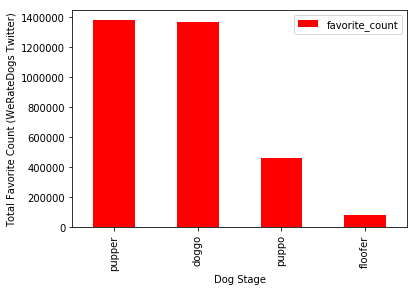

In [210]:
dfx = df_final.query('stage!="None"')
vd1 = dfx.groupby(['stage'])['favorite_count'].sum().reset_index()
vd1 = vd1.sort_values('favorite_count', ascending=False)

vd1.plot(x='stage',y='favorite_count', kind='bar', color='red');
plt.xlabel('Dog Stage')
plt.ylabel('Total Favorite Count (WeRateDogs Twitter)')
plt.show()

#### Doggo and Pupper are more popular dog stages than others

##### Let's find out the top 10 highly rated dog breeds

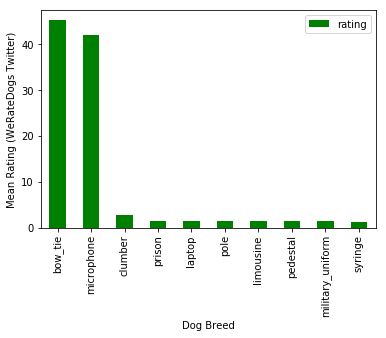

In [211]:
vd1 = df_final.groupby(['p1'])['rating'].mean().reset_index()
vd1 = vd1.sort_values('rating', ascending=False)
vdx = vd1.head(10)
vdx.plot(x='p1',y='rating', kind='bar', color='green');
plt.xlabel('Dog Breed')
plt.ylabel('Mean Rating (WeRateDogs Twitter)')
plt.show()

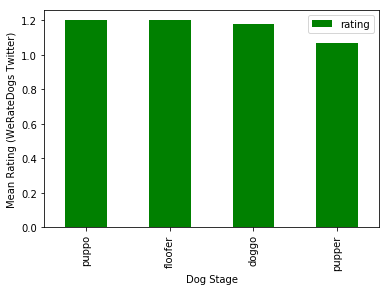

In [212]:
vd1 = df_final.query('stage!="None"').groupby(['stage'])['rating'].mean().reset_index()
vd1 = vd1.sort_values('rating', ascending=False)
vdx = vd1.head(10)
vdx.plot(x='stage',y='rating', kind='bar', color='green');
plt.xlabel('Dog Stage')
plt.ylabel('Mean Rating (WeRateDogs Twitter)')
plt.show()

##### The highest rated dog breeds are bow tie and microphone. All the dog stages have similar ratings.

#### Let's find the most popular platform for tweeting on weratedogs

We shouldn't be surprised by the answer

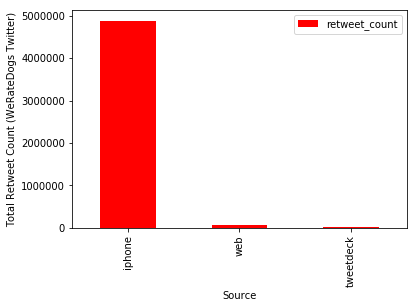

In [213]:
vd1 = df_final.groupby(['source'])['retweet_count'].sum().reset_index()
vd1 = vd1.sort_values('retweet_count', ascending=False)
vd1.plot(x='source',y='retweet_count', kind='bar', color='red');
plt.xlabel('Source')
plt.ylabel('Total Retweet Count (WeRateDogs Twitter)')
plt.show()

##### Iphone undoubtedly is the highest used platform for twitter users on weratedogs

#### Let's check most popular dog names

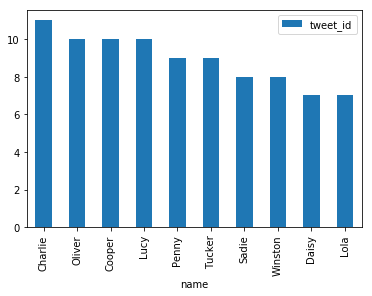

In [214]:
vd1 = df_final.query('name!="None"').groupby('name')['tweet_id'].count().reset_index()
#vd1['name'] = vd1['name'].astype(int)
vd1 = vd1.sort_values('tweet_id', ascending=False).head(10)
vd1.plot('name', kind='bar');

##### Charlie, Oliver and Cooper are the top 3 popular names

#### Let's find out the trend of retweets and favorite count over time

I expect the count to steadily increase as twitter is becoming more and more popular.

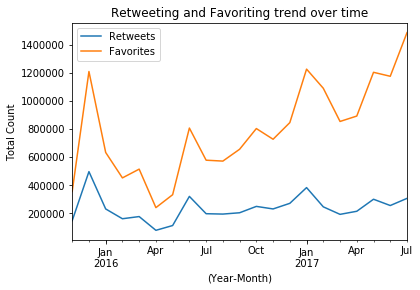

In [215]:
df_final['year_month'] = df_final['timestamp'].dt.to_period('M')
plt.subplots(1, sharex=True)
df_final.groupby('year_month')['retweet_count'].sum().plot('line')
df_final.groupby('year_month')['favorite_count'].sum().plot('line')
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Total Count')
plt.xlabel('(Year-Month)')
plt.legend(('Retweets', 'Favorites'));
